# Exercise 18

## Analyze class homeworks


In [28]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('C:/Users/Admin/Documents/1. Universidad/5. Mineria de Datos/PracticalMachineLearningClass/PracticalMachineLearningClass/datasets/E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

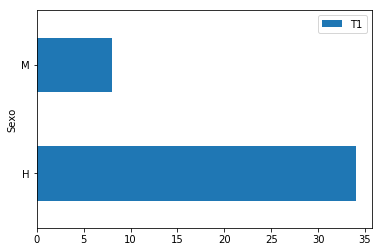

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

data.isna().sum()

data2=data.fillna(' ', inplace=False)

pd.DataFrame(pd.pivot_table(data2, index='Sexo', aggfunc='count').loc[:,'T1']).plot.barh()

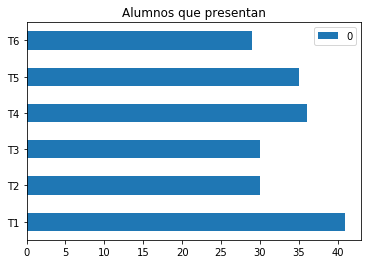

In [11]:
pd.DataFrame(data.loc[:, data.columns != 'Sexo'].notna().sum()).plot.barh(title ='Alumnos que presentan')

In [12]:
data2["Texto"] = data2["T1"]+data2["T2"]+data2["T3"]+data2["T4"]+data2["T5"]+data2["T6"]##.map(str) + dataframe["quarter"]
data2['length'] = data2['Texto'].apply(len)
data2.groupby('Sexo').describe()

length                                                                \
      count          mean          std     min      25%     50%       75%   
Sexo                                                                        
H      34.0   9797.470588  3780.833524  1436.0  7943.75  9194.5  11567.75   
M       8.0  10157.125000  2248.111299  6702.0  8918.25  9479.0  12002.50   

               
          max  
Sexo           
H     22078.0  
M     13314.0

Los escritos de las mujeres tienden a ser ligeramente mas largos que los escritos de los hombres.

In [13]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X = data2.Texto
X_dtm = vect.fit_transform(X)

df=pd.DataFrame.from_dict(vect.vocabulary_, orient='index',columns=['Number'])
df.sort_values(by='Number', ascending=False)

,Number
útiles,5891
útil,5890
únicos,5889
único,5888
únicamente,5887
única,5886
últimos,5885
último,5884
últimas,5883
última,5882


# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [14]:
import textdistance
textdistance.hamming.similarity('test', 'text')

3

In [15]:
import textdistance
hamming = textdistance.Hamming(external=False)
hamming('text', 'testit')

3

In [16]:
X.shape[0]

42

In [17]:
distancias = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        distancias[i,j] = textdistance.hamming.distance(X.iloc[i], X.iloc[j])

In [29]:
df_dist = pd.DataFrame(distancias)
df_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,10961.0,10749.0,10937.0,10847.0,10976.0,10985.0,11924.0,10956.0,10959.0,...,11070.0,10940.0,10738.0,10903.0,12067.0,13661.0,11479.0,12527.0,10915.0,10936.0
1,10961.0,0.0,10460.0,8992.0,9628.0,7955.0,7968.0,12150.0,7954.0,11131.0,...,7984.0,11119.0,10952.0,8650.0,12336.0,13842.0,8398.0,12688.0,8766.0,7893.0
2,10749.0,10460.0,0.0,10406.0,10304.0,10564.0,10572.0,11924.0,10478.0,10998.0,...,10602.0,10990.0,10783.0,10438.0,12121.0,13702.0,11009.0,12503.0,10431.0,10477.0
3,10937.0,8992.0,10406.0,0.0,9554.0,9035.0,9007.0,12071.0,8947.0,11079.0,...,9073.0,11046.0,10881.0,8967.0,12250.0,13777.0,9479.0,12605.0,8925.0,8985.0
4,10847.0,9628.0,10304.0,9554.0,0.0,9674.0,9624.0,12006.0,9628.0,11042.0,...,9725.0,10965.0,10813.0,9612.0,12186.0,13683.0,10127.0,12575.0,9506.0,9627.0


In [30]:
data

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...
5,H,Siendo dos grandes software's de analítica los...,NaN,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,NaN,Gradient Boosting es una técnica de aprendizaj...
6,H,Data Scientist y Data Engineer son dos profesi...,For Machine Learning there are 3 different typ...,Decision tree is a methodology that is used to...,NaN,According to the paper 'Do we Need Hundreds of...,NaN
7,M,Las diferencias de un científico de datos y un...,El concepto Machine Learning nace de la indust...,Los arboles de decisión son una técnica fundam...,Comencemos por definir la palabra ensamble en ...,El artículo fue publicado en octubre del 2014 ...,NaN
8,H,Uno de los criterios más importantes en la sel...,Dentro de los algoritmos usados para programar...,Los arboles de decisión son estructuras de dat...,"En términos de Machine Learning, Ensemble es l...",El artículo “¿Do we need hundreds of classifie...,"Dentro de los algoritmos de “ensembling”, más ..."
9,H,Diferencia entre un científico de datos y un i...,El aprendizaje de máquinas tiene cuatro grande...,Los tipos de algoritmos y aplicaciones de árbo...,El aprendizaje conjunto es una herramienta que...,Este papper trata de encontrar a través 121 co...,Gradient Boosting su técnica consiste en entre...


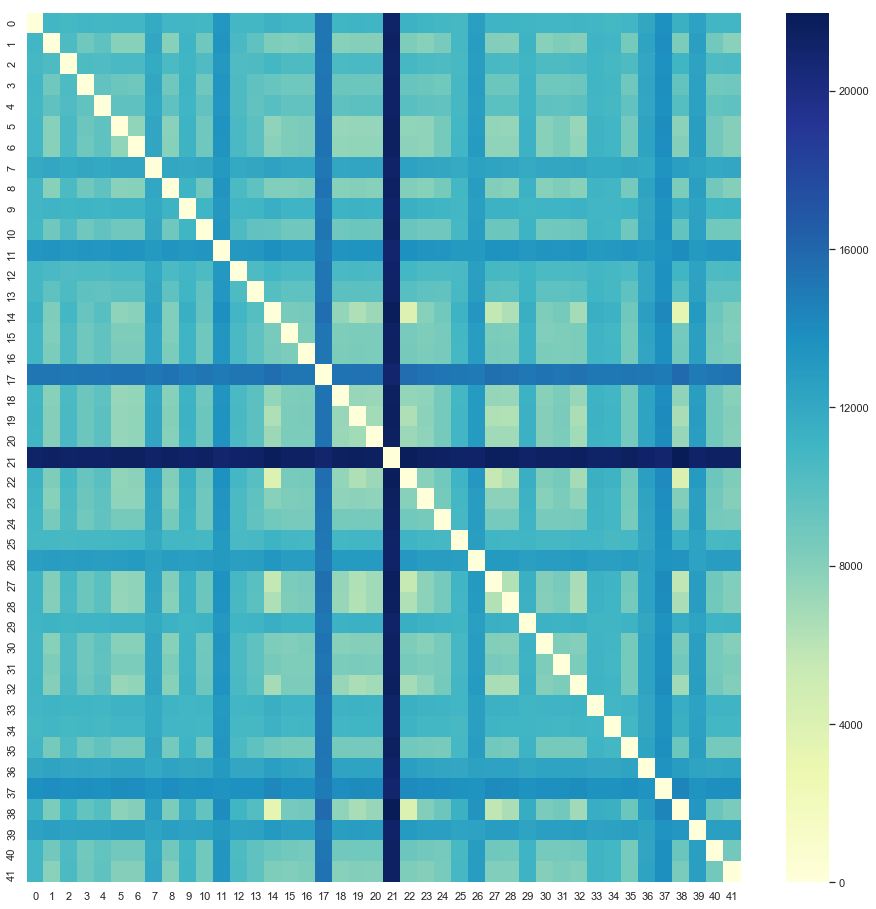

In [27]:
import seaborn as sns; sns.set()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(df_dist, cmap="YlGnBu")

# Exercise 18.3

Create a classifier to predict the sex of each student



In [31]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_dtm, data2['Sexo'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_jobs=-1,n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
y_pred = clf.predict(X_test)

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9285714285714286


In [47]:
y_pred=pd.DataFrame(y_pred, columns=['Sexo'])
y_pred

,Sexo
0,H
1,H
2,H
3,H
4,H
5,H
6,H
7,H
8,H
9,H


In [ ]:
Dado el desbalance de los datos, el modelo solo esta prediciendo hombres.